In [18]:
import random as rand
import matplotlib.pylab as plt

In [75]:
data = [rand.randint(1,6) + rand.randint(1,6) + rand.randint(1,6) for i in range(2000)]
data.sort()

In [76]:
x = [i + j/100 for i in range(3,19) for j in range(100)]
y = [len([i for i in data if i <= b])/2000 for b in x]

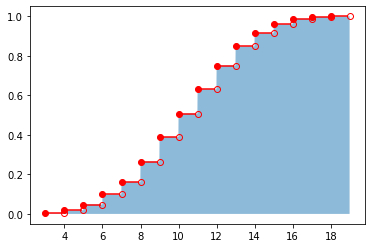

In [99]:
fig, ax = plt.subplots()
eps = .1
ax.fill_between(x, y, alpha=.5)
ax.hlines([len([i for i in data if i <= b])/2000 for b in range(3,19)],
          [a + eps for a in range(3,19)],[a - eps for a in range(4,20)], color='red')
for j in range(3,19):
    ax.plot([j],[len([i for i in data if i <= j])/2000],"ro")
    ax.plot([j+1],[len([i for i in data if i <= j])/2000],"ro",fillstyle='none')

plt.savefig('cum_dist.png')